## Separación de datos en clusters

### Importación de librerías

In [163]:
# importar librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
#importar dataset
df = pd.read_csv('https://raw.githubusercontent.com/KevinRamosRivas/G2-MINERIA_DATOS/main/IGP_Datos-Sismicos_Consolidados_V3.csv')

In [165]:
# mostrar los primeros 5 registros
df.head()

,provincia,region,mes,año,latitud(º),longitud(º),profundidad_km,magnitud_Mw
0,Huaral,Lima,1,1940,-11.5,-77.0,50.0,5.82
1,Cañete,Lima,7,1945,-13.0,-76.2,80.0,4.97
2,Cañete,Lima,8,1945,-13.0,-76.2,80.0,4.97
3,Cañete,Lima,9,1945,-13.0,-76.2,80.0,4.52
4,Cañete,Lima,9,1945,-13.0,-76.2,80.0,4.97


In [166]:
# ver la informacion del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   provincia       530 non-null    object 
 1   region          530 non-null    object 
 2   mes             530 non-null    int64  
 3   año             530 non-null    int64  
 4   latitud(º)      530 non-null    float64
 5   longitud(º)     530 non-null    float64
 6   profundidad_km  530 non-null    float64
 7   magnitud_Mw     530 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 33.2+ KB


### Separar en datos de entrenamiento y prueba

In [167]:
# separar los datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
# eliminar la provincia y region
X = df.drop(['provincia','region','magnitud_Mw'], axis=1)
y = df['magnitud_Mw']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Clustering usando KMeans

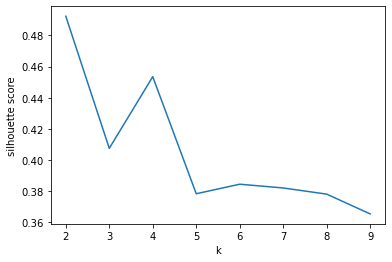

In [168]:
# importar librerias necesarias
from sklearn.cluster import KMeans

# analizar la cantidad de clusters segun el metodo de la silueta
from sklearn.metrics import silhouette_score

# crear una lista de valores para k
k_values = range(2, 10)

# crear una lista para guardar los valores de la silueta
silhouette_values = []

# iterar sobre los valores de k
for k in k_values:
    # crear el modelo de k-means
    kmeans = KMeans(n_clusters=k)
    # ajustar el modelo
    kmeans.fit(X_train)
    # obtener las etiquetas de cluster
    labels = kmeans.labels_
    # obtener el valor de la silueta
    silhouette_values.append(silhouette_score(X_train, labels))

# crear un dataframe con los valores de la silueta
silhouette_df = pd.DataFrame({'k': k_values, 'silhouette_score': silhouette_values})
# crear una grafica para visualizar los valores de la silueta
plt.plot(silhouette_df['k'], silhouette_df['silhouette_score'])
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.show()

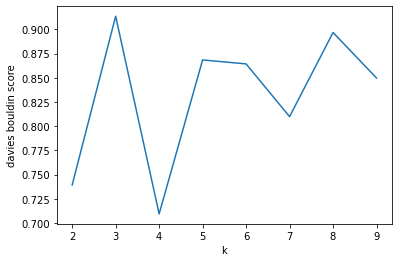

In [169]:
# usamos el metodo de davies-bouldin para determinar el numero de clusters
from sklearn.metrics import davies_bouldin_score

# crear una lista para guardar los valores de davies-bouldin
davies_bouldin_values = []

# iterar sobre los valores de k
for k in k_values:
    # crear el modelo de k-means
    kmeans = KMeans(n_clusters=k)
    # ajustar el modelo
    kmeans.fit(X_train)
    # obtener las etiquetas de cluster
    labels = kmeans.labels_
    # obtener el valor de davies-bouldin
    davies_bouldin_values.append(davies_bouldin_score(X_train, labels))

# crear un dataframe con los valores de davies-bouldin
davies_bouldin_df = pd.DataFrame({'k': k_values, 'davies_bouldin_score': davies_bouldin_values})
# crear una grafica para visualizar los valores de davies-bouldin
plt.plot(davies_bouldin_df['k'], davies_bouldin_df['davies_bouldin_score'])
plt.xlabel('k')
plt.ylabel('davies bouldin score')
plt.show()

In [170]:
# se elige k=4 y se procede a crear el modelo
kmeans = KMeans(n_clusters=4)
# ajustar el modelo
kmeans.fit(X_train)
# obtener las etiquetas de cluster
labels = kmeans.labels_

# crear una columna con las etiquetas de cluster
X_train['cluster_Kmeans'] = labels


In [171]:
X_train.head()

,mes,año,latitud(º),longitud(º),profundidad_km,cluster_Kmeans
203,12,1992,-13.1200,-76.3800,16.0,0
66,2,1984,-12.4200,-76.9400,53.0,2
449,10,2015,-10.6100,-76.8352,127.0,1
255,1,1995,-12.9500,-76.1500,12.0,0
332,2,2003,-11.1248,-77.2045,126.0,1


In [172]:
# ver la cantidad de registros por cluster
X_train['cluster_Kmeans'].value_counts()

1    143
2    117
0     86
3     25
Name: cluster_Kmeans, dtype: int64

d:\ProgramFiles\anaconda3\lib\site-packages\geopandas\array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


<AxesSubplot:>

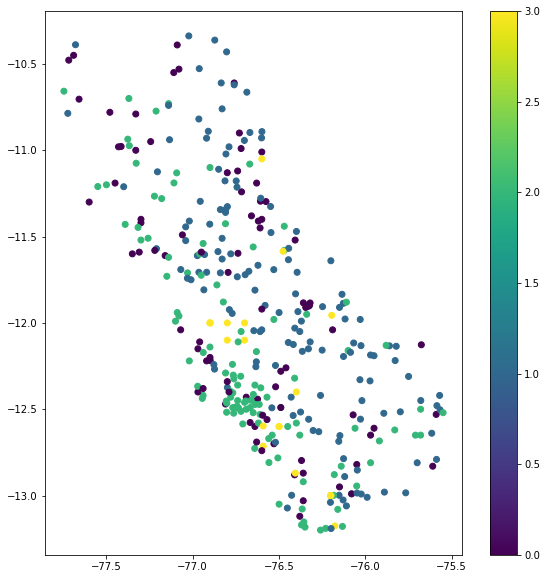

In [173]:
# ver una mapa con la latitud y longitud con geopandas
import geopandas as gpd
# crear un dataframe con las columnas de latitud y longitud y las etiquetas de cluster
df_lat_lon = X_train[['latitud(º)','longitud(º)','cluster_Kmeans']]
# cambiar el nombre de las columnas
df_lat_lon.columns = ['latitud','longitud','cluster_Kmeans']
# crear un dataframe de geopandas
gdf = gpd.GeoDataFrame(df_lat_lon, geometry=gpd.points_from_xy(df_lat_lon.longitud, df_lat_lon.latitud))
# ver en el mapa del lima
gdf.plot(column='cluster_Kmeans', legend=True, figsize=(10,10))

### Clustering usando KMedoids

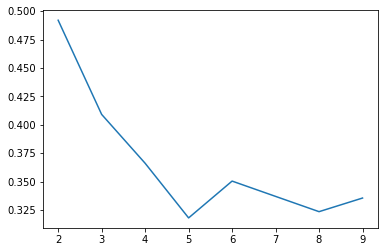

In [174]:
# importar librerias necesarias para Kmedoids
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score

# crear una lista de valores para k
k_values = range(2, 10)

# crear una lista para guardar los valores de la silueta
silhouette_values = []

# iterar sobre los valores de k
for k in k_values:
    # crear el modelo de k-medoids
    kmedoids = KMedoids(n_clusters=k)
    # ajustar el modelo
    kmedoids.fit(X_train)
    # obtener las etiquetas de cluster
    labels = kmedoids.labels_
    # obtener el valor de la silueta
    silhouette_values.append(silhouette_score(X_train, labels))

# crear un dataframe con los valores de la silueta
silhouette_df = pd.DataFrame({'k': k_values, 'silhouette_score': silhouette_values})
# crear una grafica para visualizar los valores de la silueta
plt.plot(silhouette_df['k'], silhouette_df['silhouette_score'])

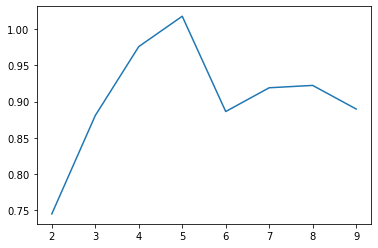

In [175]:
# usamos el metodo de davies-bouldin para determinar el numero de clusters
from sklearn.metrics import davies_bouldin_score

# crear una lista de valores para k
k_values = range(2, 10)

# crear una lista para guardar los valores de la silueta
davies_bouldin_values = []

# iterar sobre los valores de k
for k in k_values:
    # crear el modelo de k-medoids
    kmedoids = KMedoids(n_clusters=k)
    # ajustar el modelo
    kmedoids.fit(X_train)
    # obtener las etiquetas de cluster
    labels = kmedoids.labels_
    # obtener el valor de la silueta
    davies_bouldin_values.append(davies_bouldin_score(X_train, labels))

# crear un dataframe con los valores de la silueta
davies_bouldin_df = pd.DataFrame({'k': k_values, 'davies_bouldin_score': davies_bouldin_values})
# crear una grafica para visualizar los valores de la silueta
plt.plot(davies_bouldin_df['k'], davies_bouldin_df['davies_bouldin_score'])

In [176]:
# comparando los resultados de los dos metodos, se elige k=6 
kmedoids = KMedoids(n_clusters=6)
# ajustar el modelo ovbiando la columna de cluster_Kmeans
kmedoids.fit(X_train.drop(columns='cluster_Kmeans'))
labels = kmedoids.labels_

# crear una columna con las etiquetas de cluster
X_train['cluster_Kmedoids'] = labels

X_train.head()


,mes,año,latitud(º),longitud(º),profundidad_km,cluster_Kmeans,cluster_Kmedoids
203,12,1992,-13.1200,-76.3800,16.0,0,5
66,2,1984,-12.4200,-76.9400,53.0,2,0
449,10,2015,-10.6100,-76.8352,127.0,1,1
255,1,1995,-12.9500,-76.1500,12.0,0,5
332,2,2003,-11.1248,-77.2045,126.0,1,1


In [177]:
# ver la cantidad de registros por cluster
X_train['cluster_Kmedoids'].value_counts()

0    80
1    77
5    71
4    67
3    54
2    22
Name: cluster_Kmedoids, dtype: int64

d:\ProgramFiles\anaconda3\lib\site-packages\geopandas\array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


<AxesSubplot:>

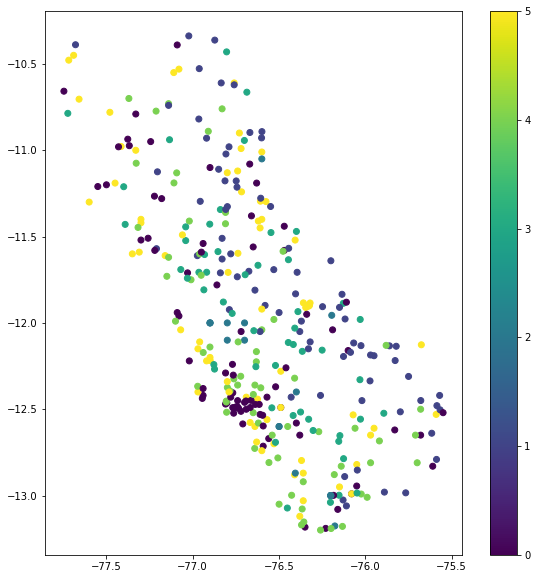

In [178]:
# ver una mapa con la latitud y longitud con geopandas
import geopandas as gpd
# crear un dataframe con las columnas de latitud y longitud y las etiquetas de cluster
df_lat_lon = X_train[['latitud(º)','longitud(º)','cluster_Kmedoids']]
# cambiar el nombre de las columnas
df_lat_lon.columns = ['latitud','longitud','cluster_Kmedoids']
# crear un dataframe de geopandas
gdf = gpd.GeoDataFrame(df_lat_lon, geometry=gpd.points_from_xy(df_lat_lon.longitud, df_lat_lon.latitud))
# ver en el mapa del lima
gdf.plot(column='cluster_Kmedoids', legend=True, figsize=(10,10))


In [179]:
# ver todos los clusters
X_train['cluster_Kmedoids'].value_counts()

0    80
1    77
5    71
4    67
3    54
2    22
Name: cluster_Kmedoids, dtype: int64

In [180]:
X_train.head()

,mes,año,latitud(º),longitud(º),profundidad_km,cluster_Kmeans,cluster_Kmedoids
203,12,1992,-13.1200,-76.3800,16.0,0,5
66,2,1984,-12.4200,-76.9400,53.0,2,0
449,10,2015,-10.6100,-76.8352,127.0,1,1
255,1,1995,-12.9500,-76.1500,12.0,0,5
332,2,2003,-11.1248,-77.2045,126.0,1,1


In [181]:
y_train.head()

203    5.1
66     4.5
449    4.5
255    4.9
332    4.5
Name: magnitud_Mw, dtype: float64

In [182]:
X_test.head()

,mes,año,latitud(º),longitud(º),profundidad_km
140,12,1989,-12.6100,-76.6600,46.0
398,7,2011,-11.6147,-76.6758,103.0
6,2,1946,-13.0000,-76.2000,80.0
334,3,2003,-12.7305,-75.7530,87.0
322,12,2000,-11.9202,-76.9046,75.0


In [183]:
y_test.head()

140    4.70
398    4.70
6      4.97
334    4.90
322    4.50
Name: magnitud_Mw, dtype: float64

In [184]:
# predecir el numero de clusters para el conjunto de test en una nueva columna
X_test['cluster_Kmedoids'] = kmedoids.predict(X_test)


In [185]:
X_test.head()

,mes,año,latitud(º),longitud(º),profundidad_km,cluster_Kmedoids
140,12,1989,-12.6100,-76.6600,46.0,0
398,7,2011,-11.6147,-76.6758,103.0,3
6,2,1946,-13.0000,-76.2000,80.0,2
334,3,2003,-12.7305,-75.7530,87.0,4
322,12,2000,-11.9202,-76.9046,75.0,4


In [186]:
# predecir el numero de clusters para el conjunto de test con Kmeans en una nueva columna
X_test['cluster_Kmeans'] = kmeans.predict(X_test.drop(columns='cluster_Kmedoids'))

In [187]:
X_test.head()

,mes,año,latitud(º),longitud(º),profundidad_km,cluster_Kmedoids,cluster_Kmeans
140,12,1989,-12.6100,-76.6600,46.0,0,2
398,7,2011,-11.6147,-76.6758,103.0,3,1
6,2,1946,-13.0000,-76.2000,80.0,2,3
334,3,2003,-12.7305,-75.7530,87.0,4,1
322,12,2000,-11.9202,-76.9046,75.0,4,2


### exportamos los datos de prueba y entrenamiento en archivos csv

In [188]:
# guardar los datos de entrenamiento y test
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

In [189]:
# cargar los datos de entrenamiento y test
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')
